
<h3>Write a program to recognize a document is positive or negative based on polarity words using suitable classification method.</h3>

<h6>We will use the corpus nlkt.corpus.movie_reviews as our data.</h6>

In [2]:
nltk.download('movie_reviews')

[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


True

In [11]:
import nltk
import numpy as np
from nltk.corpus import movie_reviews

In [8]:
print(len(movie_reviews.fileids()))
print(movie_reviews.categories())
print(movie_reviews.words()[:100])
print(movie_reviews.fileids()[:10])

2000
['neg', 'pos']
['plot', ':', 'two', 'teen', 'couples', 'go', 'to', ...]
['neg/cv000_29416.txt', 'neg/cv001_19502.txt', 'neg/cv002_17424.txt', 'neg/cv003_12683.txt', 'neg/cv004_12641.txt', 'neg/cv005_29357.txt', 'neg/cv006_17022.txt', 'neg/cv007_4992.txt', 'neg/cv008_29326.txt', 'neg/cv009_29417.txt']


<h6>Rearrange the corpus data as a list of tuple, where the first element is the word tokens of the documents, and the second element is the label of the documents (i.e., sentiment labels).</h6>

In [9]:
documents = [(list(movie_reviews.words(fileid)), category) for category in movie_reviews.categories() for fileid in movie_reviews.fileids(category)]

In [13]:
print('Number of Reviews/Documents: {}'.format(len(documents)))
print('Corpus Size (words): {}'.format(np.sum([len(d) for (d,l) in documents])))
print('\n\nSample Text of Doc 1:\n\n')
print(' '.join(documents[0][0][:50])) # first 50 words of the first document

Number of Reviews/Documents: 2000
Corpus Size (words): 1583820


Sample Text of Doc 1:


plot : two teen couples go to a church party , drink and then drive . they get into an accident . one of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . what ' s the deal ? watch


<h6>We split the entire dataset into two parts: training set and testing set.</h6>

In [16]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(documents, test_size = 0.3, random_state=42)

<h6>In the train-test split, make sure the the distribution of the classes is proportional.</h6>

In [19]:
## Check Sentiment Distribution of the Current Dataset

from collections import Counter

sentiment_distr = Counter([label for (words, label) in documents])
print(sentiment_distr)

Counter({'neg': 1000, 'pos': 1000})


In [20]:
X_train = [' '.join(words) for (words, label) in train]
X_test = [' '.join(words) for (words, label) in test]
y_train = [label for (words, label) in train]
y_test = [label for (words, label) in test]

<h6>In feature-based machine learning, we need to vectorize texts into feature sets (i.e., feature engineering on texts).

We use the naive bag-of-words text vectorization. In particular, we use the weighted version of BOW</h6>

In [21]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

tfidf_vec = TfidfVectorizer(min_df = 10, token_pattern = r'[a-zA-Z]+')
X_train_bow = tfidf_vec.fit_transform(X_train) # fit train
X_test_bow = tfidf_vec.transform(X_test) # transform test

In [22]:
print(X_train_bow.shape)
print(X_test_bow.shape)

(1400, 6344)
(600, 6344)


<h6>For our current binary sentiment classifier, we will try Logistic Regression</h6>

In [23]:
from sklearn.linear_model import LogisticRegression

model_lg = LogisticRegression()
model_lg.fit(X_train_bow, y_train)

LogisticRegression()

In [24]:
model_lg.predict(X_test_bow[:10].toarray())

array(['pos', 'pos', 'pos', 'pos', 'pos', 'pos', 'neg', 'pos', 'neg',
       'pos'], dtype='<U3')

<h4>Evaluating our model</h4>

In [25]:
#Mean Accuracy

print(model_lg.score(X_test_bow, y_test))

0.8183333333333334


In [26]:
# F1

from sklearn.metrics import f1_score

y_pred = model_lg.predict(X_test_bow)

f1_score(y_test, y_pred, 
         average=None, 
         labels = movie_reviews.categories())

array([0.81803005, 0.81863561])

C:\Users\hp\AppData\Roaming\Python\Python39\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


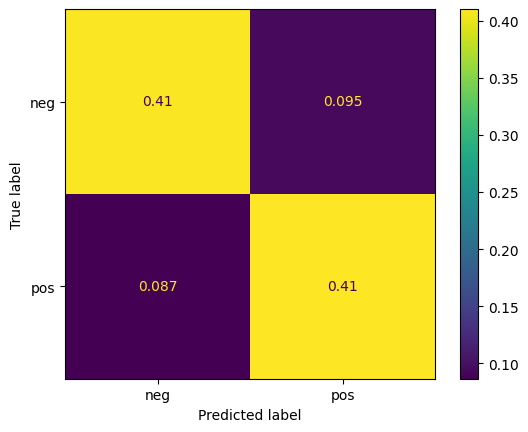

In [27]:
# Confusion Matrix

from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(model_lg, X_test_bow.toarray(), y_test, normalize='all')